<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Demonstrating_Overfitting_and_Learning_Curves_with_Generated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)
X = np.random.rand(200, 1) * 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=10)  # Intentionally deep for overfitting
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Test R-squared:", r2_test)

Train MSE: 0.0008571001643636431
Test MSE: 0.014299209908610288
Test R-squared: 0.9663847388335345


In [3]:
# Learning curve
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

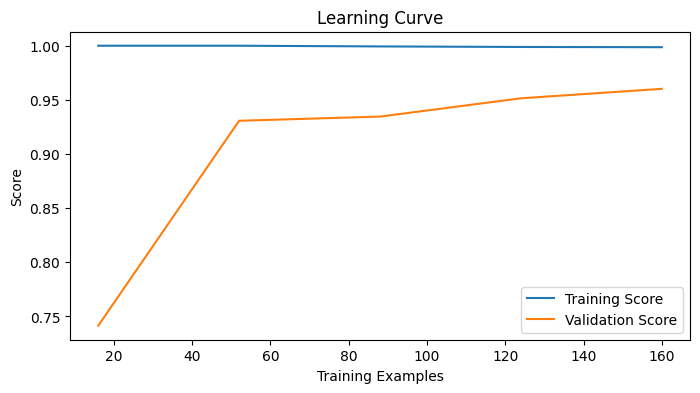

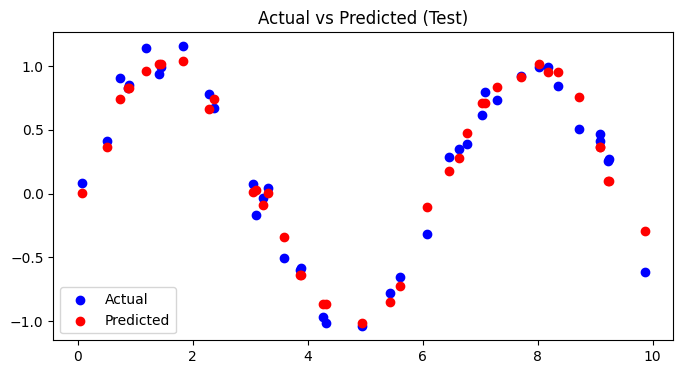

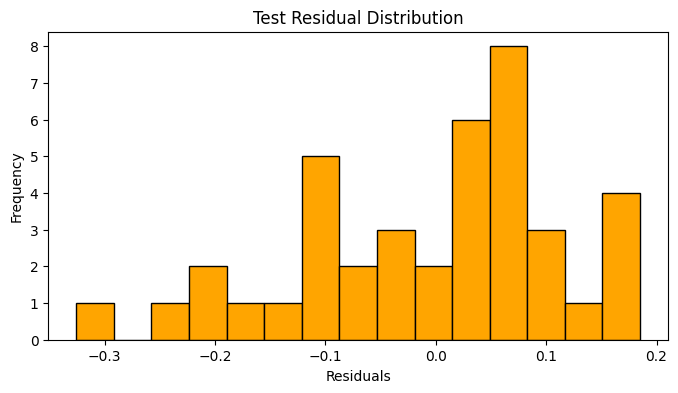

In [4]:
# Plot 1: Learning Curve
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, val_mean, label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot 2: Actual vs Predicted on Test
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.show()

# Plot 3: Residual Histogram for Test
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=15, color='orange', edgecolor='black')
plt.title('Test Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()